In [ ]:
!pip install lifelines

In [ ]:
!pip install seaborn

In [4]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import seaborn as sns
import pandas as pd

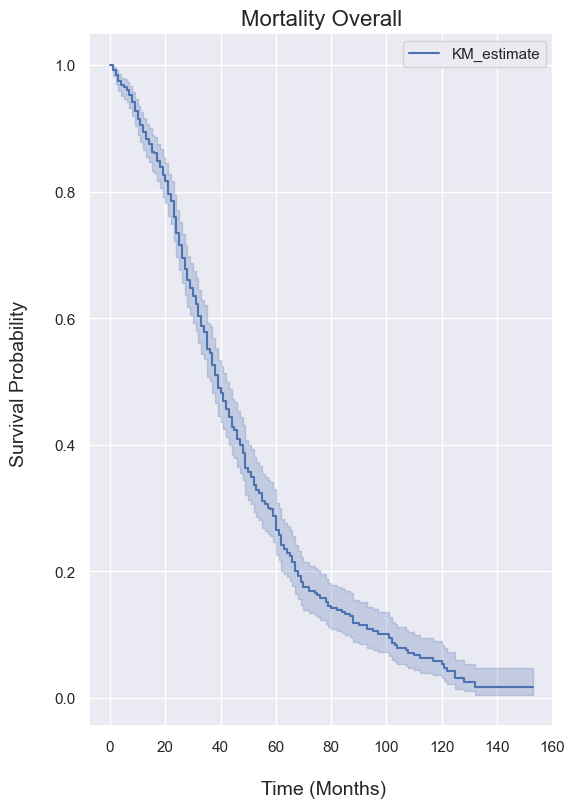

In [18]:
df = pd.read_csv('Mortality_overall.csv')

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['elapsed'], event_observed=df['DC'])

# Plot the Kaplan-Meier survival curve
sns.set(style="dark")
plt.figure(figsize=(6, 9))
kmf.plot_survival_function(ci_show=True)

# Customize the plot
plt.title("Mortality Overall", fontsize=16)
plt.xlabel("\n Time (Months)", fontsize=14)
plt.ylabel("Survival Probability \n", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


In [20]:

# Extract the survival table from the Kaplan-Meier fitter
survival_table = kmf.event_table

# Rename columns for better understanding
survival_table = survival_table.rename(columns={
    'at_risk': 'Number at Risk',
    'observed': 'Cumulative Events',
    'censored': 'Cumulative Censored'
})

# Add a cumulative count of events and censored
survival_table['Cumulative Events'] = survival_table['Cumulative Events'].cumsum()
survival_table['Cumulative Censored'] = survival_table['Cumulative Censored'].cumsum()

# Convert to month intervals (assuming time is in months; adjust as needed)
survival_table['Month'] = (survival_table.index // 1).astype(int)

# Aggregate by month
monthly_summary = survival_table.groupby('Month').last().reset_index()

# Display the summary table
print(monthly_summary)

monthly_summary.to_csv('survival_summary_overall.csv', index=False)

     Month  removed  Cumulative Events  Cumulative Censored  entrance  \
0        0        0                  0                    0       668   
1        1       88                  5                   83         0   
2        2        5                 10                   83         0   
3        3        6                 15                   84         0   
4        4        4                 19                   84         0   
..     ...      ...                ...                  ...       ...   
108    128        1                428                  236         0   
109    129        1                428                  237         0   
110    132        1                429                  237         0   
111    137        1                429                  238         0   
112    153        1                429                  239         0   

     Number at Risk  
0               668  
1               668  
2               580  
3               575  
4            

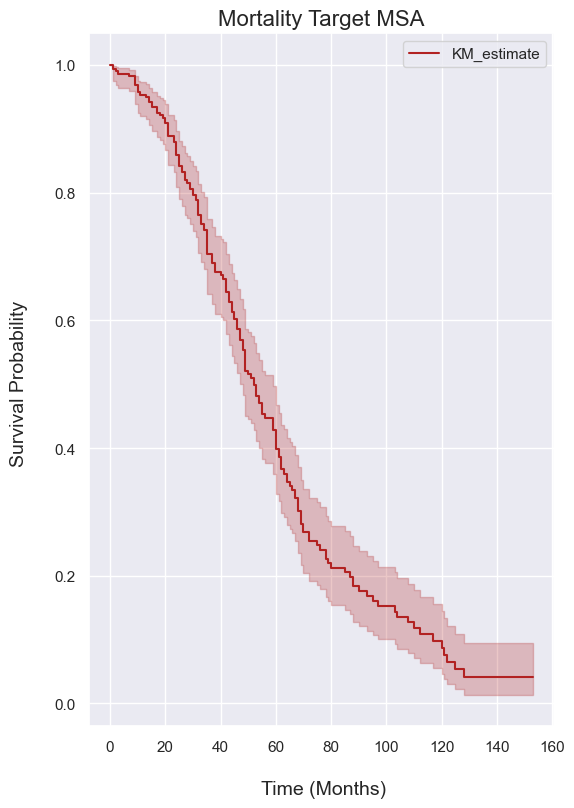

In [21]:
df = pd.read_csv('Mortality_target_msa.csv')

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['elapsed'], event_observed=df['DC'])

# Plot the Kaplan-Meier survival curve
sns.set(style="dark")
plt.figure(figsize=(6, 9))
kmf.plot_survival_function(ci_show=True, color="firebrick")

# Customize the plot
plt.title("Mortality Target MSA", fontsize=16)
plt.xlabel("\n Time (Months)", fontsize=14)
plt.ylabel("Survival Probability \n", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


In [22]:

# Extract the survival table from the Kaplan-Meier fitter
survival_table = kmf.event_table

# Rename columns for better understanding
survival_table = survival_table.rename(columns={
    'at_risk': 'Number at Risk',
    'observed': 'Cumulative Events',
    'censored': 'Cumulative Censored'
})

# Add a cumulative count of events and censored
survival_table['Cumulative Events'] = survival_table['Cumulative Events'].cumsum()
survival_table['Cumulative Censored'] = survival_table['Cumulative Censored'].cumsum()

# Convert to month intervals (assuming time is in months; adjust as needed)
survival_table['Month'] = (survival_table.index // 1).astype(int)

# Aggregate by month
monthly_summary = survival_table.groupby('Month').last().reset_index()

# Display the summary table
print(monthly_summary)

monthly_summary.to_csv('survival_summary_target_msa.csv', index=False)

    Month  removed  Cumulative Events  Cumulative Censored  entrance  \
0       0        0                  0                    0       316   
1       1       42                  2                   40         0   
2       2        1                  3                   40         0   
3       3        2                  4                   41         0   
4       7        2                  5                   42         0   
..    ...      ...                ...                  ...       ...   
95    127        1                172                  140         0   
96    128        1                173                  140         0   
97    129        1                173                  141         0   
98    137        1                173                  142         0   
99    153        1                173                  143         0   

    Number at Risk  
0              316  
1              316  
2              274  
3              273  
4              271  
..       